Found 384 anomalies


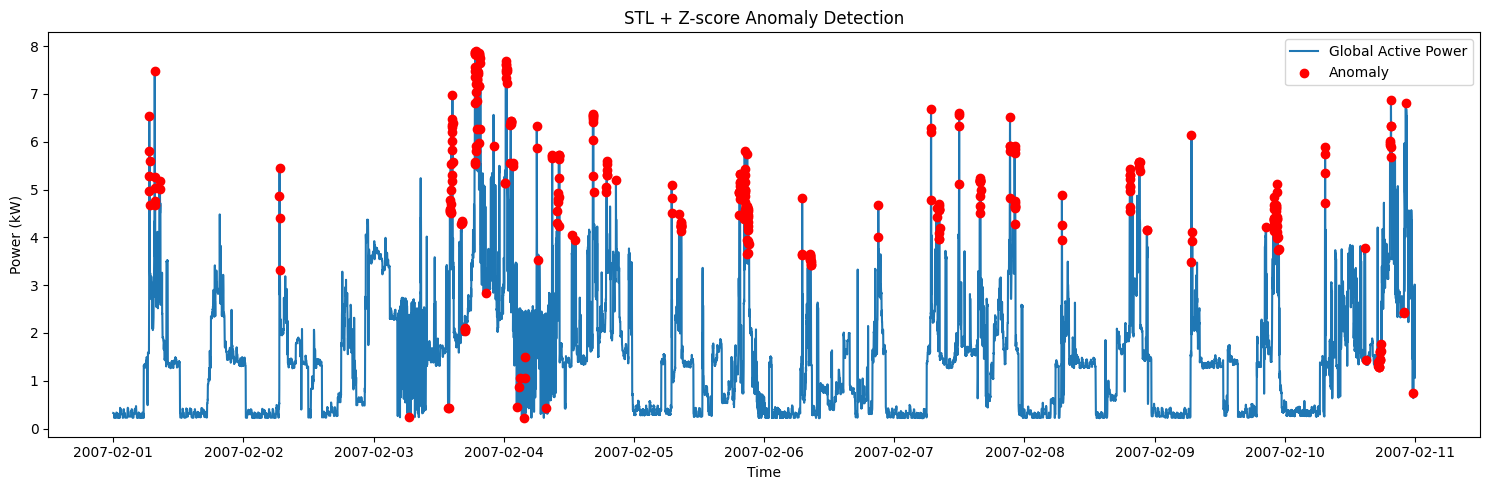

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load sample data
df = pd.read_csv("../data/processed/sample_power_data.csv", parse_dates=["datetime"], index_col="datetime")
df = df.sort_index()

# Focus on main metric
series = df["Global_active_power"]

# STL decomposition
stl = STL(series, period=144, robust=True)  # 144 = 10-min readings per day (6 per hour × 24)
result = stl.fit()

# Extract residuals
residual = result.resid

# Z-score on residuals
threshold = 3
z_scores = (residual - residual.mean()) / residual.std()
anomalies = z_scores[np.abs(z_scores) > threshold]

print(f"Found {len(anomalies)} anomalies")

# Plot
plt.figure(figsize=(15, 5))
plt.plot(series.index, series, label="Global Active Power")
plt.scatter(anomalies.index, series.loc[anomalies.index], color="red", label="Anomaly", zorder=3)
plt.title("STL + Z-score Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
df["anomaly"] = 0
df.loc[anomalies.index, "anomaly"] = 1
df.to_csv("../data/processed/stl_anomaly_output.csv")
